# cnn시작

In [24]:
import warnings
warnings.filterwarnings('ignore')


import cv2
from glob import glob
import os
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import imageio
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras import models, layers, regularizers, optimizers
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import pydot

In [14]:
image_datas = glob('C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi10000\\*')  
#여기 경로는 C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi 이것만 바꿔주세요(자기 경로로)
dic = {'Bulbasaur':0, 'Clefairy':1, 'Gastly':2, "Growlithe":3, "Jigglypuff":4, 'Mew':5, 'Pikachu':6, 'Poliwag':7, 'Psyduck':8, 'Slowpoke':9}

In [15]:
print('총 이미지 개수:', len(image_datas))


총 이미지 개수: 10560


In [16]:
X = list()       
Y = list()     

for picname in image_datas:       
    try:                          
        pic = cv2.imread(picname) 
        pic = cv2.resize(pic, dsize=(56, 56))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    
        pic = np.array(pic)
        X.append(pic)         
    
        label = picname.split('\\') 
        label = label[6] 
        label = label.split('.')
        label = str(label[0])   
        label = dic[label]       
        Y.append(label)  
    except :   
        pass

X = np.array(X)   
Y = np.array(Y)
print('X shape:', X.shape)
print('Y shape:', Y.shape)


X shape: (9845, 56, 56, 3)
Y shape: (9845,)


In [17]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=44)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(7876, 56, 56, 3)
(1969, 56, 56, 3)
(7876,)
(1969,)


In [18]:
img_rows = 56
img_cols = 56
input_shape = (img_rows, img_cols, 3)
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 3)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 3)
train_images = train_images.astype('float') / 255
test_images = test_images.astype('float') / 255

print('train_images_shape: ', train_images.shape)
print('test_images_shape: ', test_images.shape)


train_images_shape:  (7876, 56, 56, 3)
test_images_shape:  (1969, 56, 56, 3)


In [19]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print('train_labels shape:', train_labels.shape)
print('test_labels shape', test_labels.shape)

train_labels shape: (7876, 10)
test_labels shape (1969, 10)


In [11]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu', 
            kernel_regularizer = regularizers.l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)             

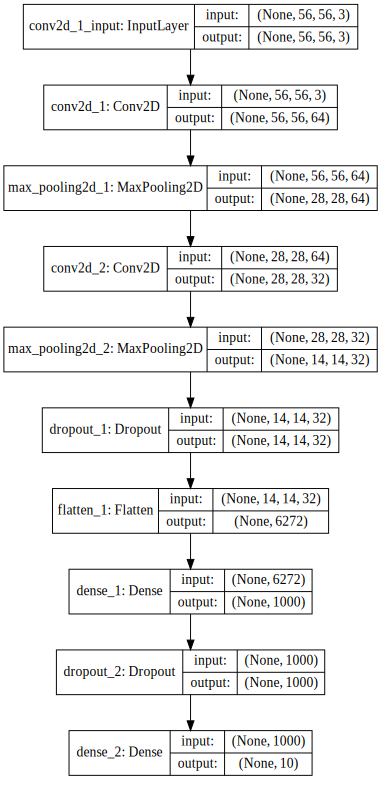

In [12]:
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [13]:
MODEL_DIR = './model/'             
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  
early_stopping = EarlyStopping(monitor = 'val_loss', patience=10, verbose=1, mode = 'auto')  

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) 
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, verbose=1, validation_data=(test_images, test_labels),
callbacks = [early_stopping, checkpointer]) 

Train on 7876 samples, validate on 1969 samples
Epoch 1/40
7876/7876 [==============================] - 25s 3ms/step - loss: 1.8516 - accuracy: 0.3936 - val_loss: 1.4553 - val_accuracy: 0.5322

Epoch 00001: val_loss improved from inf to 1.45525, saving model to ./model/1.4553.hdf5
Epoch 2/40
7876/7876 [==============================] - 37s 5ms/step - loss: 1.2034 - accuracy: 0.6455 - val_loss: 1.0133 - val_accuracy: 0.7100

Epoch 00002: val_loss improved from 1.45525 to 1.01327, saving model to ./model/1.0133.hdf5
Epoch 3/40
7876/7876 [==============================] - 36s 5ms/step - loss: 0.9018 - accuracy: 0.7477 - val_loss: 0.8246 - val_accuracy: 0.7796

Epoch 00003: val_loss improved from 1.01327 to 0.82455, saving model to ./model/0.8246.hdf5
Epoch 4/40
7876/7876 [==============================] - 36s 5ms/step - loss: 0.7221 - accuracy: 0.8122 - val_loss: 0.7035 - val_accuracy: 0.8299

Epoch 00004: val_loss improved from 0.82455 to 0.70345, saving model to ./model/0.7035.hdf5
Epoc

# dnn으로는 4만장 사용하면 95퍼 나왔는데 cnn은 1만장만 사용해도 97프로

In [14]:
score = model.evaluate(test_images, test_labels) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1969/1969 [==============================] - 1s 695us/step
Test loss: 0.39529065924770884
Test accuracy: 0.9405789971351624


Train 데이터를 넣었을 때 정확도와 Test 데이터 넣었을 때 정확도 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

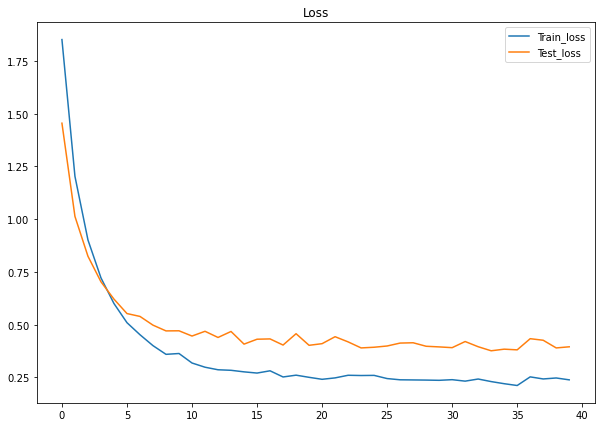

In [15]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label = 'Train_loss')
plt.plot(history.history['val_loss'], label='Test_loss')
plt.title('Loss')
plt.legend()
plt.show

Train 데이터를 넣었을 때 정확도와 Test 데이터 넣었을 때 정확도 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

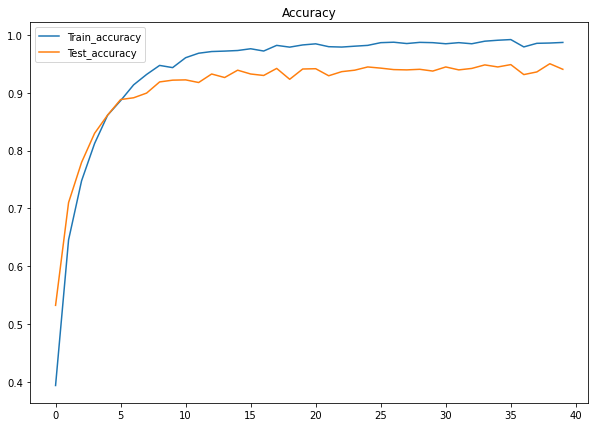

In [16]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Test_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show

# 준지도 시작

레이블이 없는 데이터를 모델을 통해 예측 후 레이블 추가

In [15]:
predict_classes = np.argmax(model_best.predict(test_images), axis = 1)
predict_classes.shape

(4923,)

In [16]:
train_images2 = (train_images * 255).astype(int)
test_images2 = (test_images * 255).astype(int)
X2 = np.concatenate((train_images2, test_images2))
print(X2.shape)

(9845, 56, 56, 3)


In [17]:
predict_classes = predict_classes.tolist()

In [18]:
predict_classes = to_categorical(predict_classes, 10)
predict_classes.shape

(4923, 10)

In [19]:
Y2 = np.concatenate((train_labels, predict_classes))

In [20]:
Y2.shape

(9845, 10)

레이블이 있는 데이터와 레이블이 없는 데이터를 합쳐서 다시 모델 학습

In [21]:
semi_train_images, semi_test_images, semi_train_labels, semi_test_labels = train_test_split(X2, Y2, random_state=44, test_size=0.2, shuffle=True)
print(semi_train_images.shape)
print(semi_test_images.shape)
print(semi_train_labels.shape)
print(semi_test_labels.shape)


(7876, 56, 56, 3)
(1969, 56, 56, 3)
(7876, 10)
(1969, 10)


In [22]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(1000, activation='relu', 
            kernel_regularizer = regularizers.l2(0.0001)))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 56, 56, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

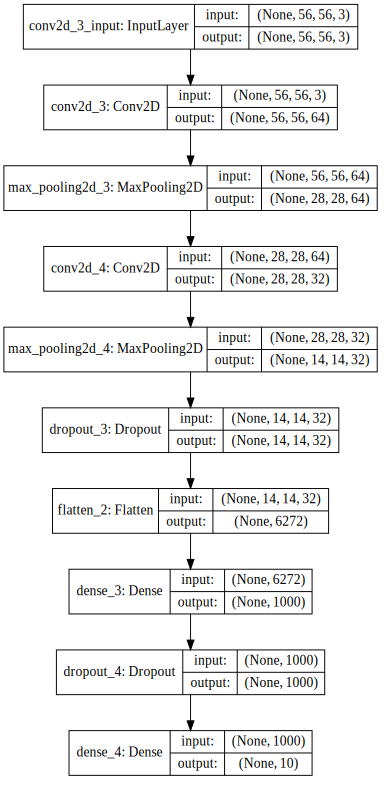

In [23]:
%matplotlib inline

SVG(model_to_dot(model2, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [24]:
MODEL_DIR = './model2/'             
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model2/{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  
early_stopping = EarlyStopping(monitor = 'val_loss', patience=10, verbose=1, mode = 'auto')  

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) 
history2 = model.fit(semi_train_images, semi_train_labels, batch_size=128, epochs=40, verbose=1, validation_data=(semi_test_images, semi_test_labels),
callbacks = [early_stopping, checkpointer]) 

Train on 7876 samples, validate on 1969 samples
Epoch 1/40
7876/7876 [==============================] - 19s 2ms/step - loss: 39.6719 - accuracy: 0.8711 - val_loss: 9.5022 - val_accuracy: 0.9411

Epoch 00001: val_loss improved from inf to 9.50219, saving model to ./model2/9.5022.hdf5
Epoch 2/40
7876/7876 [==============================] - 21s 3ms/step - loss: 8.6185 - accuracy: 0.9276 - val_loss: 4.0193 - val_accuracy: 0.9553

Epoch 00002: val_loss improved from 9.50219 to 4.01929, saving model to ./model2/4.0193.hdf5
Epoch 3/40
7876/7876 [==============================] - 27s 3ms/step - loss: 4.4903 - accuracy: 0.9364 - val_loss: 3.8112 - val_accuracy: 0.9568

Epoch 00003: val_loss improved from 4.01929 to 3.81119, saving model to ./model2/3.8112.hdf5
Epoch 4/40
7876/7876 [==============================] - 39s 5ms/step - loss: 3.1004 - accuracy: 0.9520 - val_loss: 2.7957 - val_accuracy: 0.9700

Epoch 00004: val_loss improved from 3.81119 to 2.79573, saving model to ./model2/2.7957.hdf5

# 준지도 학습 사용해서 정확도 96프로 낫배드

In [28]:
model_best2 = models.load_model('./model2/2.7750.hdf5')  
score = model_best2.evaluate(semi_test_images, semi_test_labels) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1969/1969 [==============================] - 1s 709us/step
Test loss: 2.7749513568930846
Test accuracy: 0.9659726023674011


<function matplotlib.pyplot.show(close=None, block=None)>

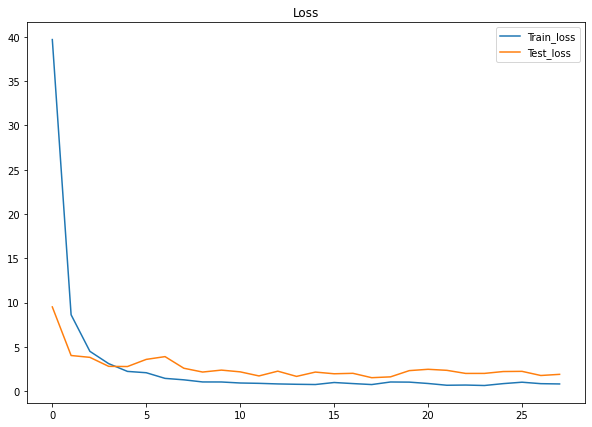

In [29]:
plt.figure(figsize=(10,7))
plt.plot(history2.history['loss'], label = 'Train_loss')
plt.plot(history2.history['val_loss'], label='Test_loss')
plt.title('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

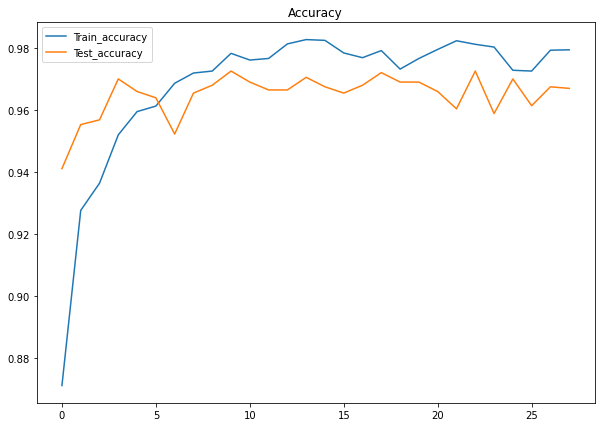

In [30]:
plt.figure(figsize=(10,7))
plt.plot(history2.history['accuracy'], label = 'Train_accuracy')
plt.plot(history2.history['val_accuracy'], label='Test_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show

# GAN 시작

In [34]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf

In [33]:
#이미지가 저장될 폴더가 없다면 만듭니다.

if not os.path.exists("./gan_images2"):
    os.makedirs("./gan_images2")

In [35]:
np.random.seed(3)
tf.random.set_seed(3)

In [36]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
# 예: model.add(Dense(10)) : 출력노드 수를 10개
# 여기서 출력노드개수는 128*7*7=6272. 7*7은 최초의 이미지크기. 
#업샘플링 2번하므로 7-14-28로 늘어남
# 128은 입의의 수. 바꿔도 아무 문제없음. 
# input_dim=100 은 인풋으로 100차원의 랜덤벡터
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128))) 
# 6272 길이의 벡터를 7*7*?? 크기로 reshape
generator.add(UpSampling2D()) # 이미지의 가로,세로 크기를 2배씩 늘려줌 
generator.add(Conv2D(64, kernel_size=5, padding='same')) 
#케라스에서 upsampling+Conv2D 를 합쳐놓은 Conv2DTranspose 함수도 제공함
#Parameter 1: 커널을 몇 개 적용할지 정함. 여러개의 커널을 적용하면 서로 다른 featuremap이 여러개 나옴. 
#padding='same': 컨볼루션 후에 크기가 작아지는걸 방지하기 위해서. 
#크기를 같게 만들기 위해 알아서 zero padding
#kernel_size=5 -> kernel_size=(5,5)
generator.add(BatchNormalization()) 
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(3, kernel_size=5, padding='same', activation='tanh')) 
generator.summary()
#activation='tanh'을 사용하므로 생성자의 출력값이 -1~1
# 판별자 들어올 MNIST 손글씨의 범위도 -1~1로 맞춰줘야함. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
batch_normalization (BatchNo (None, 6272)              25088     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0

In [37]:
#판별자 모델을 만듭니다.
# 분류가 목표이므로 판별자로는 CNN 구조를 사용하면 됨. 
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,3), padding="same"))
# Parameter 1: 커널을 몇 개 적용할지 정함. 여러개의 커널을 적용하면 
#서로 다른 featuremap이 여러개 나옴. 
# Parameter 2: 커널의 크기를 정함. kernel_size=(행, 열)  
# Parameter 3: input_shape: 맨 처음 층에는 입력되는 값을 알려주어야함 
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))# 과적합을 피하기 위해서 dropout 사용. 30% 노드를 빼고 70%노드를 사용
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten()) #활성화함수를 사용하기전에 2차원을 1차원으로 바꿔줌
discriminator.add(Dense(1, activation='sigmoid')) 
#activation='sigmoid' 이므로 출력값은 0-1, 위조지폐를 보고 진짜1, 가짜0 판별
#'sigmoid'는 이진분류에서 많이 사용함
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False 
discriminator.summary()
#discriminator 모델에서는 가중치 갱신이 일어나고,
#gan 모델에서는 가중치 갱신이 일어나지 않음
#discriminator가 gan안에서 generator와 같이 학습할 때는
#가중치가 고정되어 있어야 함

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        4864      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [38]:
#생성자와 판별자 모델을 연결시키는 "gan 모델"을 만듭니다.
ginput = Input(shape=(100,)) #100차원의 벡터를 인풋으로
dis_output = discriminator(generator(ginput)) #생성자의 28*28 짜리 출력이 분별자의 인풋으로 들어가서 참,거짓을 판단함
gan = Model(ginput, dis_output) 
#케라스의 Model 함수 (sequential 대신 사용). Model 은 GAN, AE 사용할때 사용
gan.compile(loss='binary_crossentropy', optimizer='adam') #true, false 구분하는 binary crossentropy 와 adam 으로 컴파일시킴
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 3)         868483    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 216065    
Total params: 1,084,548
Trainable params: 855,811
Non-trainable params: 228,737
_________________________________________________________________


epoch:0  d_loss:0.0187  g_loss:5.3151
epoch:1  d_loss:0.0428  g_loss:5.1056
epoch:2  d_loss:0.0125  g_loss:4.8818
epoch:3  d_loss:0.0164  g_loss:4.8716
epoch:4  d_loss:0.0946  g_loss:4.2083
epoch:5  d_loss:0.0220  g_loss:4.1169
epoch:6  d_loss:0.0411  g_loss:4.4820
epoch:7  d_loss:0.0183  g_loss:4.7222
epoch:8  d_loss:0.0222  g_loss:5.2257
epoch:9  d_loss:0.0682  g_loss:4.4950
epoch:10  d_loss:0.0523  g_loss:3.9750
epoch:11  d_loss:0.0822  g_loss:3.9216
epoch:12  d_loss:0.0269  g_loss:5.0532
epoch:13  d_loss:0.0078  g_loss:5.7887
epoch:14  d_loss:0.0899  g_loss:5.5927
epoch:15  d_loss:0.0451  g_loss:4.2205
epoch:16  d_loss:0.0282  g_loss:3.5869
epoch:17  d_loss:0.0388  g_loss:3.9601
epoch:18  d_loss:0.0140  g_loss:4.9018
epoch:19  d_loss:0.0082  g_loss:6.4337
epoch:20  d_loss:0.0197  g_loss:7.4668
epoch:21  d_loss:0.0441  g_loss:6.7178
epoch:22  d_loss:0.1314  g_loss:4.0810
epoch:23  d_loss:0.0867  g_loss:3.4422
epoch:24  d_loss:0.0524  g_loss:5.2292
epoch:25  d_loss:0.0080  g_loss:6.9

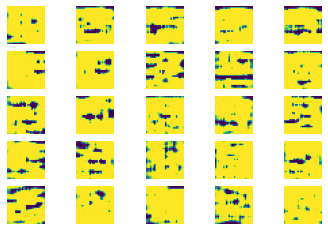

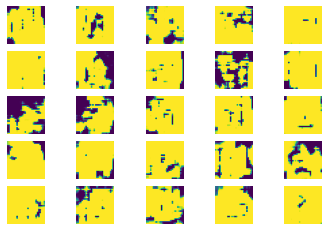

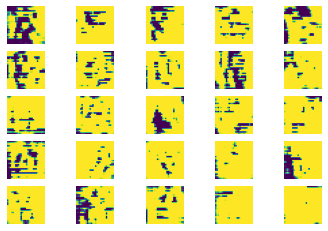

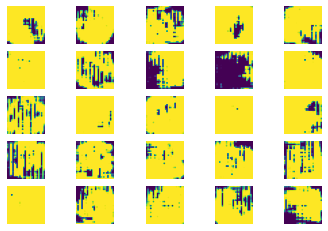

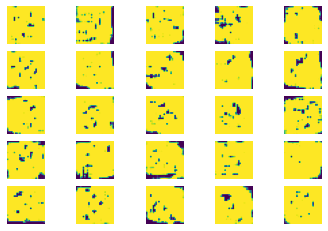

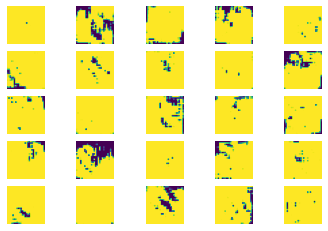

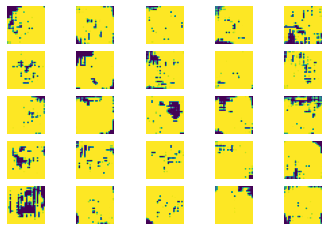

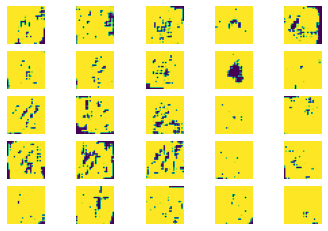

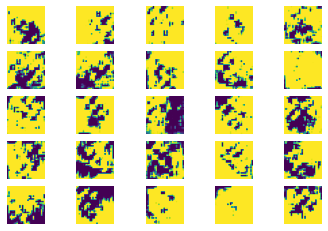

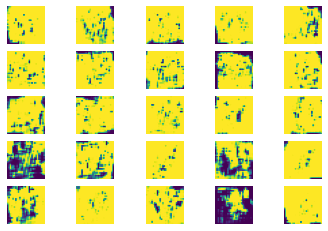

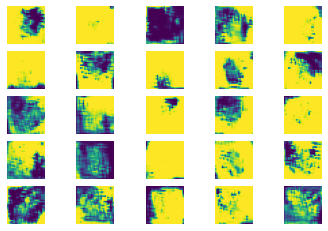

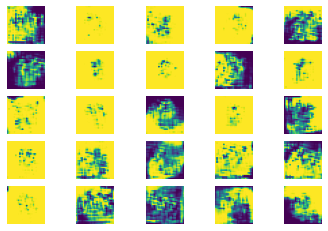

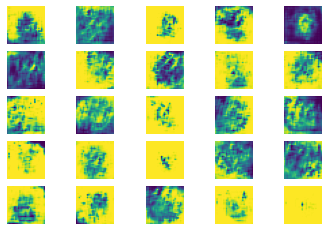

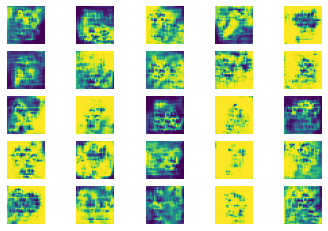

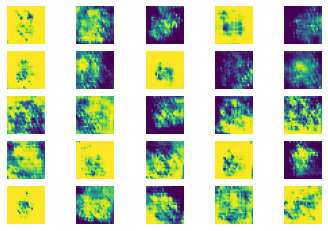

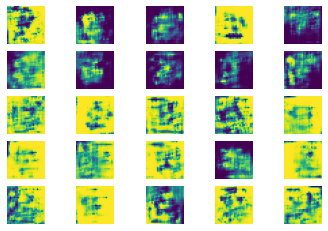

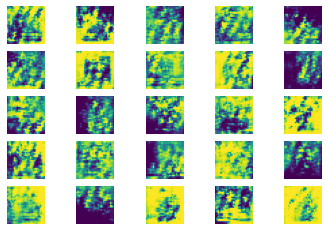

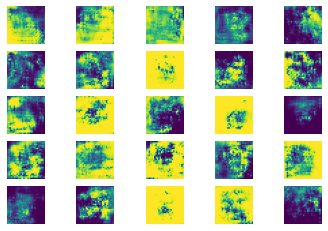

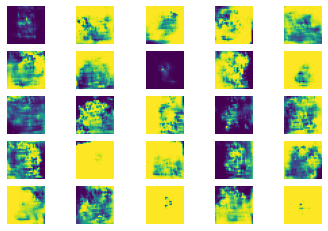

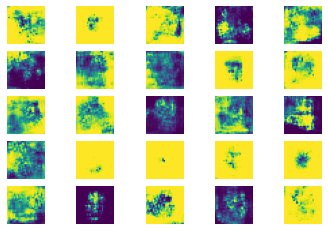

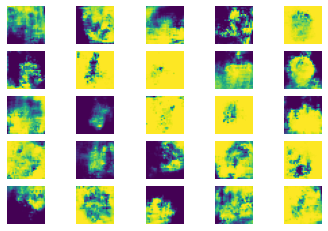

In [40]:
def gan_train(epoch, batch_size, saving_interval): #saving_interval: 몇번마다 한번씩 중간결과를 저장할 것인가'

  all_images = glob('C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi10000\\*.jpg')  

  X_train = list()
  for imagename in all_images:
    try:
      image = cv2.imread(imagename)
      image = cv2.resize(image, dsize=(28, 28))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
      image = np.array(image) 
      X_train.append(image) 
    except:
      pass
  X_train = np.array(X_train) 


  X_train = X_train.reshape(X_train.shape[0], 28, 28, 3).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀값은 0에서 255사이의 값입니다. 
  #이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 
  #여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  #X_train.shape

  true = np.ones((batch_size, 1)) #배치사이즈만큼의 1로 이루어진 array를 만듬
  fake = np.zeros((batch_size, 1))

  for i in range(epoch): #에포크 갯수만큼 반복
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size) 
          #np.random.randint(a,b,c): a부터 b까지 숫자중에 하나를 랜덤하게 
            #선택하여 가져오는 과정을 c번 반복
          #6만개의 인덱스를 batch size로 샘플링 - 셔플링하는 과정
          ################ 1
          imgs = X_train[idx] # 위에서 랜덤하게 선택된 숫자 index에 해당하는 이미지를 불러옴
          d_loss_real = discriminator.train_on_batch(imgs, true)
          #train_on_batch(x,y): 입력x 라벨y를 이용해서 1번 학습을 
          #진행하고 모델을 업데이트함
          #즉, imgs 변수에 있는 이미지를 가지고 true (1로 이루어진 배열) 
          #변수를 라벨로 삼아서 분별자 모델업데이트
          #가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100)) 
          #np.random.normal(a,b,c): a를 평균으로 b의 표준편차를 
        #가지는 정규분포에서 shape이 batch_size, 100가 되도록 랜덤하게 뽑아라
          #(batch_size, 100): batch size만큼 100열을 뽑아라.
          ################ 2
          gen_imgs = generator.predict(noise) #noise 변수에 저장된 값이 생성자로 들어가고, 결과 가짜이미지가 저장됨
            
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake) 
          #train_on_batch(x,y): 입력x 라벨y를 이용해서 1번 학습을 진행하고 모델을 업데이트함

          #판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #d(discriminator)의 loss function: real, fake 값을 더해서 2로 나눈 평균
          g_loss = gan.train_on_batch(noise, true) 
        #gan 모델을 업데이트시키는 방법, 생성자의 레이블을 true 라고 하고 판별자로 넘김
        

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0])
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("gan_images2/poke%d.png" % i)

gan_train(4001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.

# gan ㄹㅇ똥 모르겠다 이 부분 움짤인데 경로 수정해주면 움짤 확이 가능

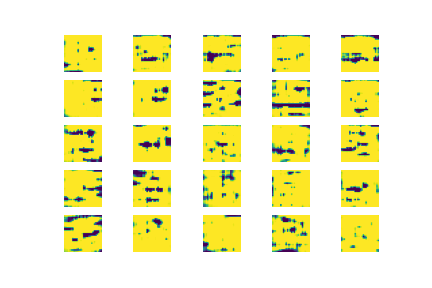

In [4]:
anim_file = 'poke.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob('C:\\Users\\Master\\Desktop\\gan_images2\\poke*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
from IPython import display
display.Image(filename=anim_file)

In [42]:
from keras.applications import VGG19
from keras.applications.resnet50 import ResNet50, preprocess_input

In [43]:
transfer_model = VGG19(weights='imagenet', include_top=False, input_shape=(56, 56, 3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten()) 
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(10, activation='softmax'))
finetune_model.summary()

80142336/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
______________________________________________________________

In [44]:
finetune_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
finetune_model.fit(train_images, train_labels, batch_size=100, epochs=30, validation_data=(test_images, test_labels))


Train on 7876 samples, validate on 1969 samples
Epoch 1/30
7876/7876 [==============================] - 178s 23ms/step - loss: 2.2114 - accuracy: 0.2178 - val_loss: 2.0705 - val_accuracy: 0.3012
Epoch 2/30
7876/7876 [==============================] - 194s 25ms/step - loss: 1.9181 - accuracy: 0.3987 - val_loss: 1.8245 - val_accuracy: 0.4292
Epoch 3/30
7876/7876 [==============================] - 189s 24ms/step - loss: 1.7070 - accuracy: 0.4756 - val_loss: 1.6563 - val_accuracy: 0.4845
Epoch 4/30
7876/7876 [==============================] - 192s 24ms/step - loss: 1.5675 - accuracy: 0.5201 - val_loss: 1.5394 - val_accuracy: 0.5236
Epoch 5/30
7876/7876 [==============================] - 182s 23ms/step - loss: 1.4643 - accuracy: 0.5533 - val_loss: 1.4530 - val_accuracy: 0.5526
Epoch 6/30
7876/7876 [==============================] - 191s 24ms/step - loss: 1.3844 - accuracy: 0.5766 - val_loss: 1.3810 - val_accuracy: 0.5764
Epoch 7/30
7876/7876 [==============================] - 179s 23ms/step

In [45]:
score = finetune_model.evaluate(test_images, test_labels) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1969/1969 [==============================] - 36s 19ms/step
Test loss: 0.8600827270561575
Test accuracy: 0.7364144325256348
